In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec 
%matplotlib inline

In [120]:
data = pd.read_csv('../input/Video_Games_Sales_as_at_22_Dec_2016.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
temp = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum()
temp = temp.loc[temp.groupby('Year_of_Release').idxmax()].reset_index()

temp_1 = data.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum()
temp_1 = temp_1.loc[temp_1.groupby('Year_of_Release').idxmax()].reset_index()

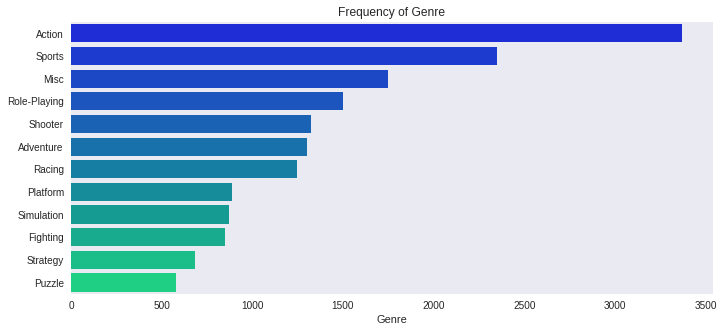

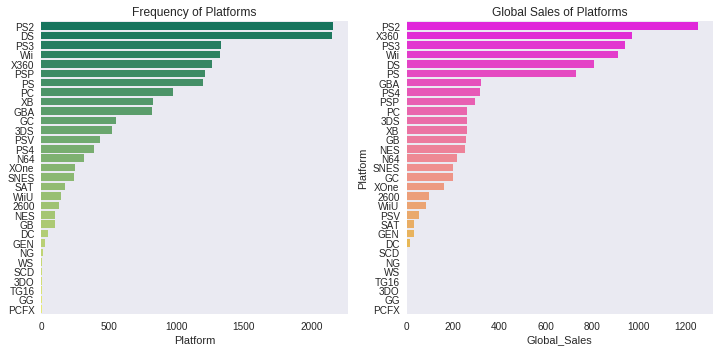

In [122]:
plt.style.use('seaborn-notebook')
plt.figure(figsize = [11.5,5])
Genre = data['Genre'].value_counts()
sns.barplot(x = Genre, y = Genre.index, palette = 'winter', )
plt.title('Frequency of Genre')
f,ax = plt.subplots(1,2,figsize = [10.1,5])
Platform = data['Platform'].value_counts()
sns.barplot(x = Platform, y = Platform.index, palette = 'summer',ax = ax[0])
ax[0].set_title('Frequency of Platforms')
Sales_by_platform = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)
sns.barplot(x = Sales_by_platform, y = Sales_by_platform.index, palette = 'spring',ax = ax[1])
ax[1].set_title('Global Sales of Platforms')
plt.tight_layout()

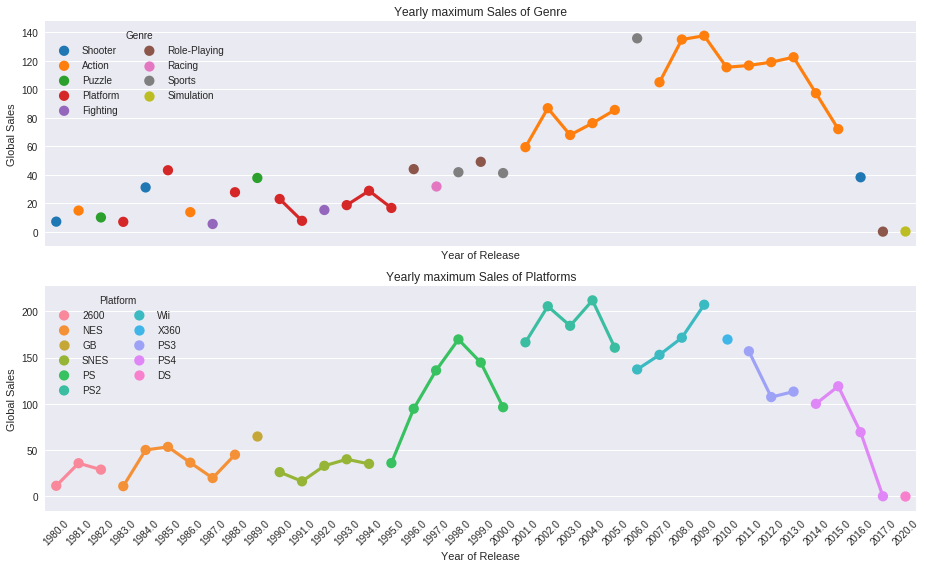

In [123]:
plt.style.use('seaborn-darkgrid')
f, ax = plt.subplots(2, 1, figsize = [13,8], sharex = True)

x = sns.pointplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Genre', data = temp, ax = ax[0])
ax[0].set_title('Yearly maximum Sales of Genre',)
ax[0].set_xlabel('Year of Release')
ax[0].set_ylabel('Global Sales')
ax[0].legend(loc = 0,ncol = 2, title = 'Genre')
plt.setp(ax[0].get_xticklabels(), rotation = 45)

sns.pointplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Platform', data = temp_1, ax = ax[1])
ax[1].legend(loc = 0, ncol = 2, title = 'Platform')
ax[1].set_title('Yearly maximum Sales of Platforms')
ax[1].set_xlabel('Year of Release')
ax[1].set_ylabel('Global Sales')
#ax[1].set_rotation(45)
plt.setp(ax[1].get_xticklabels(), rotation = 45)
f.tight_layout()

In [124]:
data.dropna(inplace = True)

In [125]:
popular_games = data.duplicated('Name')
popular_games = data[popular_games]
most_popular_games = popular_games.loc[popular_games['User_Count'] > 3000].copy()
most_popular_games.sort_values(by = 'User_Count', ascending = False, inplace = True)
most_popular_games[['Name','User_Count','Critic_Score','Year_of_Release']][:10]

,Name,User_Count,Critic_Score,Year_of_Release
2851,The Witcher 3: Wild Hunt,10665.0,93.0,2015.0
313,The Elder Scrolls V: Skyrim,9073.0,94.0,2011.0
1530,Fallout 4,7512.0,84.0,2015.0
3067,BioShock Infinite,7322.0,94.0,2013.0
2356,Call of Duty: Modern Warfare 2,6430.0,86.0,2009.0
2703,Portal 2,5999.0,95.0,2011.0
2126,Mass Effect 3,5926.0,89.0,2012.0
1040,Call of Duty: Modern Warfare 3,5664.0,78.0,2011.0
37,Call of Duty: Modern Warfare 3,5234.0,88.0,2011.0
538,Battlefield 3,4926.0,89.0,2011.0


_____________________________________________________________________________________________________ 
From the above DataFrame we observe that Call of Duty: MW3 appeared 3 times because of different platforms. Their addition of 'User Counts' even exceed the 'User Counts' of The Witcher 3. In the later analysis we do not need 1 games appear more than once.



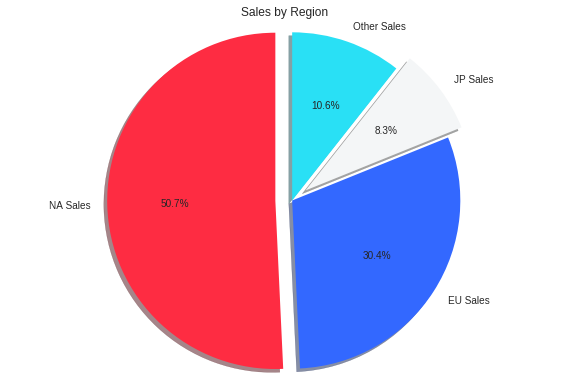

In [126]:
Pies = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.pie(Pies,startangle = 90,autopct='%1.1f%%',explode = [0.1,0,0.1,0], shadow = True, 
        labels = ['NA Sales','EU Sales', 'JP Sales','Other Sales'], 
        colors = ['#fe2c42','#3368ff','#f4f6f7','#29e0f5'])
plt.axis('equal',)
plt.title('Sales by Region')
plt.tight_layout()

Most of the Sales are from *NA Region* . Other Regions such as *JP* and *Other Regions.* It could mean that,
* Most games are pirated by those regions with low Sales.
* Since most of the games produced are Action based, Regions other than NA do not like it.
* The price at which the games are sold in other regions could also effect the Sales.

In [143]:
EU = data.groupby('Genre')['EU_Sales'].sum()*100/data['Genre'].value_counts()
NA = data.groupby('Genre')['NA_Sales'].sum()*100/data['Genre'].value_counts()
JP = data.groupby('Genre')['JP_Sales'].sum()*100/data['Genre'].value_counts()
Other = data.groupby('Genre')['Other_Sales'].sum()*100/data['Genre'].value_counts()
print('% Regional Sales')
pd.DataFrame([NA,EU,JP,Other],index = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']).T


% Regional Sales


,NA Sales,EU Sales,JP Sales,Other Sales
Action,36.271779,23.790184,4.673006,9.046626
Adventure,15.649194,10.104839,3.520161,3.245968
Fighting,36.082011,16.005291,7.367725,6.650794
Misc,57.825521,31.369792,8.651042,10.523438
Platform,48.039702,26.937965,10.692308,8.071960
Puzzle,28.389831,20.372881,12.694915,5.364407
Racing,38.827883,28.340792,4.777969,10.032702
Role-Playing,30.832865,16.741573,17.200843,5.668539
Shooter,51.939815,30.222222,2.149306,10.173611
Simulation,31.016835,22.656566,8.808081,5.771044


In [128]:
data.dropna(inplace = True)

In [129]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors = 'ignore')

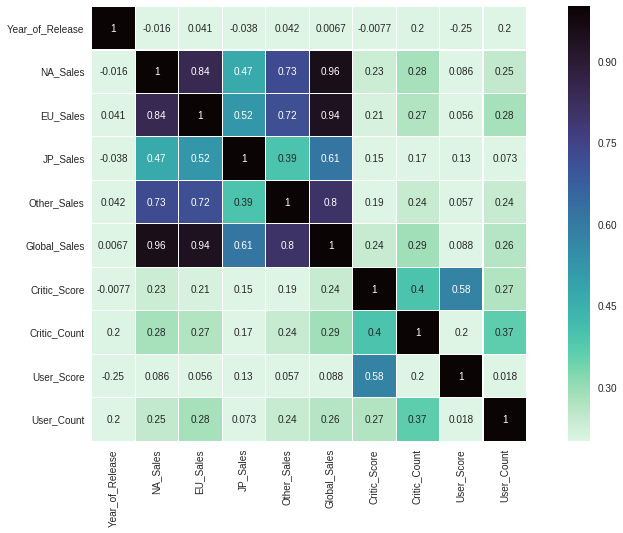

In [146]:
data_corr = data.corr()
plt.figure(figsize = [15,8])
sns.heatmap(data_corr,square = True, annot = True, cmap = 'mako_r',vmin = 0.2, linewidths = 0.2)

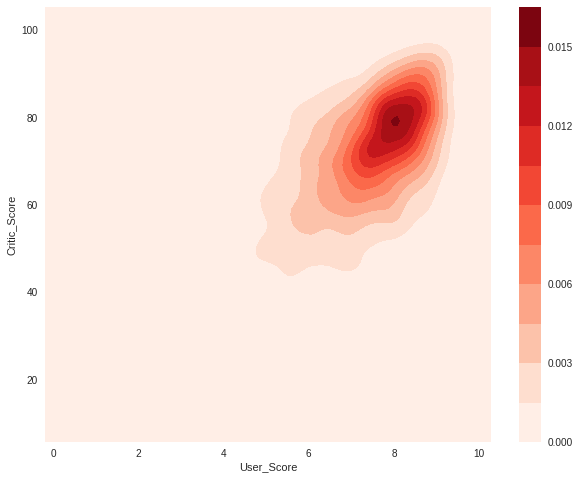

In [131]:
plt.figure(figsize = [10,8])
cmap = sns.cubehelix_palette(n_colors = 20, start = 0, light = 0.9, gamma = 1, rot = 0.1, hue = 1, as_cmap = True)
sns.kdeplot(data = data['User_Score'], data2 = data['Critic_Score'], shade = True, cbar = True,
            cmap = 'Reds')

In [132]:
data['Company'] = data['Platform'].replace(['PC','XOne','X360','XB'], 'Microsoft').replace(
    ['DS', 'Wii', 'WiiU', '3DS', 'GC', 'GBA'],'Nintendo').replace(
    ['PS2', 'PS3', 'PS4','PSP','PS','PSV','DC'],'Sony')

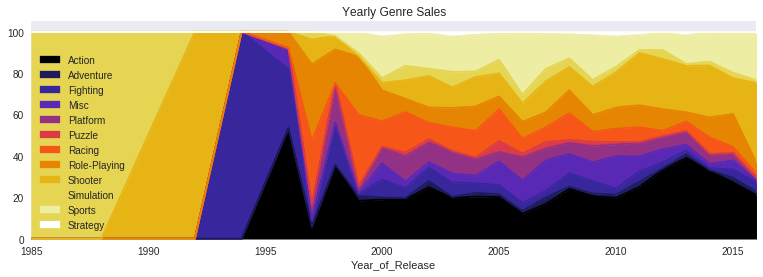

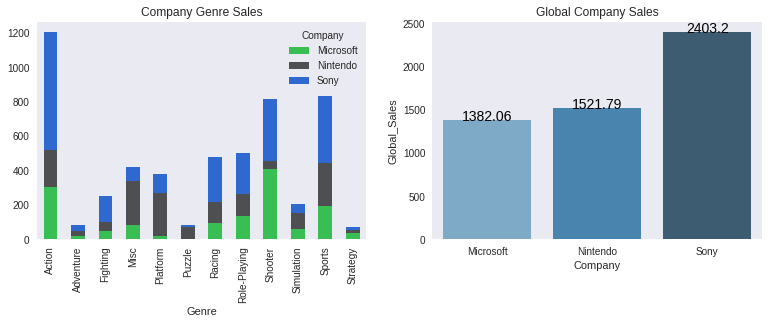

In [133]:
plt.style.use(['seaborn-dark'])
genre_sales_by_year = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum()*100/data.groupby(['Year_of_Release'])['Global_Sales'].sum()
# target*100/total
genre_sales_by_year = genre_sales_by_year.unstack()
Company_Sales_by_genre = data.groupby(['Genre','Company'])['Global_Sales'].sum().unstack()
Company_sales = data.groupby('Company')['Global_Sales'].sum()
Company_sales = Company_sales.reset_index()

genre_sales_by_year.plot(kind = 'area', stacked = True, colormap = 'CMRmap', figsize = (13,4),grid = False)
plt.title('Yearly Genre Sales')
plt.legend(loc = 0, shadow = True)


f,ax = plt.subplots(1,2,figsize = [13,4])

Company_Sales_by_genre.plot(kind = 'bar', stacked = True,color = ['#38be52','#4e4f51','#2f69cf'],ax = ax[0] )
ax[0].set_title('Company Genre Sales')

pal = sns.color_palette('Blues_d',len(Company_sales))
rank = Company_sales['Global_Sales'].argsort().argsort()
#first argsort() to arrange them from low to high second to get their rank

g = sns.barplot(x = 'Company', y = 'Global_Sales', data = Company_sales, palette = np.array(pal[::-1])[rank])
for index, row in Company_sales.iterrows():
    g.text(row.name, row.Global_Sales, round(row.Global_Sales,2), color='black', ha="center", size = 14)
ax[1].set_title('Global Company Sales')

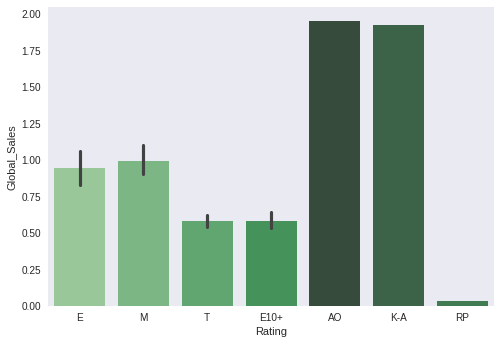

In [163]:
pal = sns.color_palette('Greens_d',len(data['Rating'].unique()))
rank = data['Rating'].value_counts().argsort().argsort()
sns.barplot(x = 'Rating', y = 'Global_Sales', data = data, palette = np.array(pal)[rank])

In [135]:
data.dropna(inplace = True)

In [136]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Company'],
      dtype='object')

In [165]:
new_data = data.drop(['Publisher','Critic_Score','Critic_Count','User_Score',
                      'User_Count','Developer','Rating','Company'],axis = 1).copy()
new_data.sort_values(by = ['Name','Global_Sales'],inplace = True, ascending = False)
new_data.drop_duplicates(subset = ['Name'], keep = 'first', inplace = True)
TenYearGamesFrom2001 = new_data[new_data['Year_of_Release'].isin([x for x in range(2000,2011,1)])]

In [166]:
TenYearGamesFrom2001['Platform'].value_counts().head(5)

PS2     1050
DS       349
Wii      331
X360     312
PSP      257
Name: Platform, dtype: int64

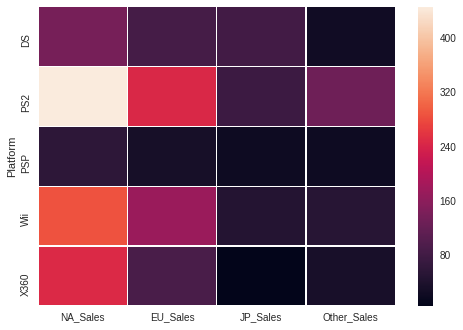

In [167]:
TenYearGamesFrom2001 = TenYearGamesFrom2001.loc[TenYearGamesFrom2001['Platform'].isin(['PS2','DS','Wii','X360','PSP'])]
TenYearGamesFrom2001 = TenYearGamesFrom2001.groupby(['Platform']).agg(np.sum)
sns.heatmap(TenYearGamesFrom2001.iloc[:,1:5],linewidths = 0.2)

In [168]:
TenYearGamesFrom2011 = new_data[new_data['Year_of_Release'].isin([x for x in range(2011,2021,1)])]
TenYearGamesFrom2011['Platform'].value_counts().head(5)

PS3     218
PS4     204
3DS     125
X360    124
PC       81
Name: Platform, dtype: int64

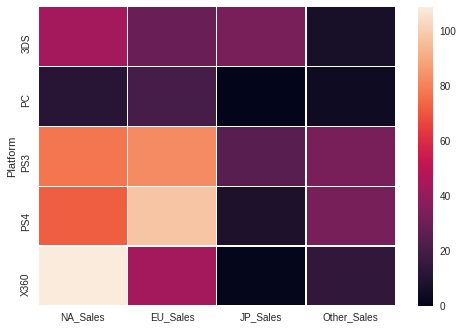

In [169]:
TenYearGamesFrom2011 = TenYearGamesFrom2011.loc[TenYearGamesFrom2011['Platform'].isin(['PS3','PS4','3DS','X360','PC'])]
TenYearGamesFrom2011 = TenYearGamesFrom2011.groupby(['Platform']).agg(np.sum)
sns.heatmap(TenYearGamesFrom2011.iloc[:,1:5], linewidths = 0.2)